<Axes: >

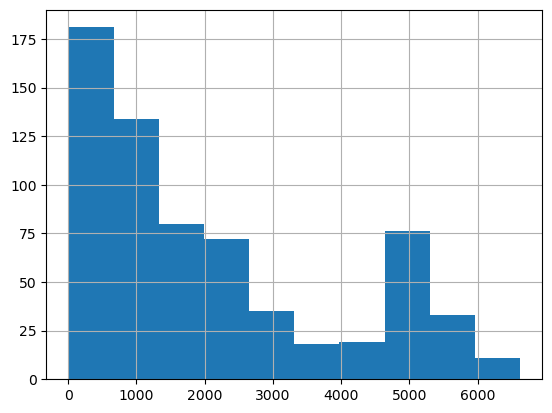

In [3]:
import os
os.chdir("/DeepenData/Repos/Flux_v0")
import warnings
warnings.filterwarnings("ignore")
import time

import releases.simv6_1 as sim


dataset = sim.DatasetTTP.desde_csv_atenciones("data/fonasa_monjitas.csv.gz")  # IdOficina=2)
un_dia = dataset.un_dia("2023-05-15").sort_values(by="FH_Emi", inplace=False)
skills = sim.obtener_skills(un_dia)
#########################
#---Ver tiempos de espera históricos---
#########################
un_dia.T_Esp.hist()

In [14]:


planificacion = sim.plan_desde_skills(skills, inicio="08:00:00", porcentaje_actividad=1)
planificacion

{'7': [{'inicio': '08:00:00',
   'termino': None,
   'propiedades': {'skills': [10, 12],
    'configuracion_atencion': 'FIFO',
    'porcentaje_actividad': 1,
    'atributos_series': [{'serie': 5,
      'sla_porcen': 76,
      'sla_corte': 1037,
      'pasos': 4,
      'prioridad': 5},
     {'serie': 10,
      'sla_porcen': 83,
      'sla_corte': 1357,
      'pasos': 1,
      'prioridad': 6},
     {'serie': 11,
      'sla_porcen': 81,
      'sla_corte': 1006,
      'pasos': 1,
      'prioridad': 2},
     {'serie': 12,
      'sla_porcen': 78,
      'sla_corte': 1071,
      'pasos': 1,
      'prioridad': 4},
     {'serie': 14,
      'sla_porcen': 78,
      'sla_corte': 635,
      'pasos': 4,
      'prioridad': 1},
     {'serie': 17,
      'sla_porcen': 82,
      'sla_corte': 1178,
      'pasos': 2,
      'prioridad': 3}]}}],
 '10': [{'inicio': '08:00:00',
   'termino': None,
   'propiedades': {'skills': [17, 14],
    'configuracion_atencion': 'Rebalse',
    'porcentaje_actividad': 1,
    

In [24]:

start_time = time.time()
hora_cierre = "15:30:00"
registros_atenciones, fila = sim.simv06(
                                        un_dia, hora_cierre, planificacion)
print(f"{len(registros_atenciones) = }, {len(fila) = }")
end_time = time.time()
print(f"tiempo total: {end_time - start_time:.1f} segundos")

registros_atenciones[registros_atenciones.espera != 0 ].sort_values('FH_Emi').head(10), registros_atenciones[registros_atenciones.espera != 0 ].sort_values('FH_Emi').tail(10)





len(registros_atenciones) = 659, len(fila) = 0
tiempo total: 3.7 segundos


(                     FH_Emi FH_AteIni IdSerie T_Ate IdEsc espera Priority
 270003  2023-05-15 08:41:37  08:43:11      14   124    10    120        3
 270004  2023-05-15 08:41:50  08:46:11      14   305    10    300        3
 270006  2023-05-15 08:42:09  08:48:11      14   149    12    420      NaN
 270007  2023-05-15 08:42:21  08:48:11      14   312    13    360        2
 270008  2023-05-15 08:42:50  08:51:11      14   241    12    540      NaN
 270009  2023-05-15 08:43:13  08:52:11      14   334    10    540        3
 270010  2023-05-15 08:43:26  08:54:11      14   115    13    660        2
 270011  2023-05-15 08:43:38  08:56:11      14   246    12    780      NaN
 270022  2023-05-15 08:47:27  08:49:11      12   421     7    120      NaN
 270023  2023-05-15 08:47:39  08:49:11      10    32     2    120      NaN,
                      FH_Emi FH_AteIni IdSerie T_Ate IdEsc espera Priority
 271290  2023-05-15 14:05:08  14:17:11      10    68     3    780      NaN
 271291  2023-05-15 14:0

<Axes: >

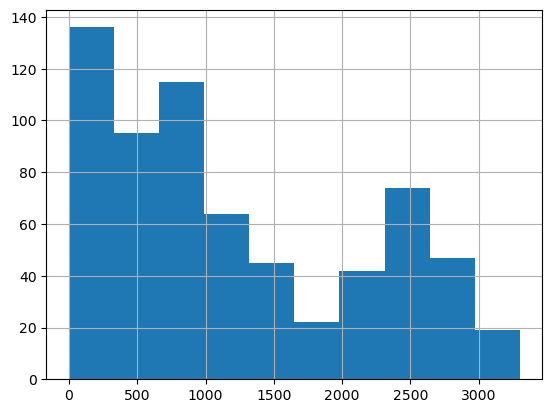

In [25]:


#########################
#---Ver tiempos de espera simulados---
#########################
registros_atenciones.espera.hist()